
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

**Entregable 1 - Parte 2**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy.stats
import plotly.express as px

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

**Estimación puntual**

Como estimador puntual tomamos la diferencia de las medias entre los grupos:

In [ ]:
# Diferencias de las medias del grupo A y el grupo B
groupA.mean()-groupB.mean()

23262.37339991823

Por lo tanto, un estimador puntual para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros es $23262.37

**Estimación por intervalo de confianza del 95%**

Observamos en primer lugar que las muestras son independientes. A continuación calculamos los tamaños de cada muestra.

In [ ]:
# Cálculo de los tamaños de las muestras
nA=len(groupA)
nB=len(groupB)
print(nA)
print(nB)

4815
891


Así, $n_A=4815$ y $n_B=891$. Son muestras grandes, por lo que no hace falta asumir normalidad (Teorema Central del Límite).

En segundo lugar tenemos que ver si las muestras tienen igual varianza, para ello implementamos un F-test con un nivel de confianza de $\alpha=0.05$:

$H_0 : \sigma_A^2=\sigma_B^2$ (igual varianzas)

$H_1: \sigma_A^2\neq\sigma_B^2$ (diferentes varianzas)

Se rechaza la hipótesis nula si:

$\frac{s_A^2}{s_B^2}>f_{n_A-1;n_B-1;\alpha/2}$.

In [ ]:
# Cálculo de medias y desvíos estándar para ambos grupos
sA=groupA.std()
xA=groupA.mean()

sB=groupB.std()
xB=groupB.mean()

print(sA)
print(xA)
print(sB)
print(xB)
print((sA*sA)/(sB*sB))

102215.30468444877
101481.62434267918
56515.32732350074
78219.25094276095
3.2711417233920344


Luego, $\frac{s_A^2}{s_B^2}=3.27$. Ahora calculamos el valor crítico $f_{n_A-1;n_B-1;0.025}$:

In [ ]:
# Cálculo de f_{nA-1;nB-1;alpha/2}
scipy.stats.f.ppf(q=1-0.025, dfn=4814, dfd=890)

1.1084601403677432

Entonces, $f_{n_A-1;n_B-1;0.025}=1.108$.

Como $\frac{s_A^2}{s_B^2}>f_{n_A-1;n_B-1;0.025}$ se rechaza la hiótesis nula. Con lo cual se considera que las varianzas son diferentes.

Dado que las muestras no tienen igual varianza utilizaremos el método de Welch para calcular el intervalo de confianza.

Se tiene entonces el intervalo de confianza:

$$[\overline{X_A}-\overline{X_B}-t_{gl;\frac{\alpha}{2}}EE;\overline{X_A}-\overline{X_B}+t_{gl;\frac{\alpha}{2}}EE],$$

donde 
$$EE=\sqrt{\frac{s_A^2}{n_A}+\frac{s_B^2}{n_B}}$$ y 
$$gl=\frac{(s_A^2/n_A+s_B^2/n_B)^2}{(s_A^2/n_A)^2/(n_A-1)+(s_B^2/n_B)^2/(n_B-1)}.$$

In [ ]:
# Cálculo de EE
EE=np.sqrt((sA*sA)/nA+(sB*sB)/nB)
print(EE)

2398.8738051609844


In [ ]:
# Cálculo de gl (grados de libertad)
gl=(np.power((sA*sA)/nA+(sB*sB)/nB,2))/((np.power((sA*sA)/nA,2))/(nA-1)+(np.power((sB*sB)/nB,2))/(nB-1))
print(gl)

2148.0505828160885


Por lo tanto los grados de libertad son 2148. Ahora calculamos $t_{2148;0.025}$.

In [ ]:
# Cálculo de t_{gl;apha/2}
t=scipy.stats.t(df=2148).ppf(0.975)
print(t)

1.9610690058607219


Ya estamos en condiciones de calcular el intervalo de confianza del 95%:

In [ ]:
# Cálculo de límite inferior y límite superior del intervalo de confianza del 95%
lim_inf = xA-xB-t*EE
lim_sup = xA-xB+t*EE
print(lim_inf)
print(lim_sup)

18558.01633164585
27966.73046819061


El intervalo de confianza del 95% para la diferencia de medias de hombres y otros géneros es $[18558.02;27966.73]$. Como $0$ no pertenece al intervalo de confiaza podemos concluir que las medias de hombres y otros géneros son significativamente diferentes con un nivel de confianza de 0.05. 

Los intervalos de confiaza y los test de hipótesis son dos caras de la misma moneda. Se espera llegar a las mismas conclusiones a través de los dos métodos. 

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0:\mu_A=\mu_B$ (las medias poblacionales de ambos grupos son iguales)

**Hipótesis Alternativa**

$H_1:\mu_A\neq\mu_B$ (la media poblacional del grupo A es distinta a la media poblacional del grupo B)

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$

Ya vimos en el ejercicio anterior que las muestras tienen diferentes varianzas por lo que se utilizará un Test de Welch:

El estadístico es:

$$t_{obs}=\frac{\overline{X_A}-\overline{X_B}}{\sqrt{s_A^2/n_A+s_B^2/n_B}}.$$

Bajo $H_0$ el estadístico $t_{obs}$ tiene una distribución t de student con $gl$ grados de libertad, donde 

$$gl=\frac{(s_A^2/n_A+s_B^2/n_B)^2}{(s_A^2/n_A)^2/(n_A-1)+(s_B^2/n_B)^2/(n_B-1)}.$$
 




### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

Cálculo del estádístico $t_{obs}$:

In [ ]:
# Cálculo del estadístico tobs
tobs=(xA-xB)/(np.sqrt((sA*sA)/nA+(sB*sB)/nB))
print(tobs)

9.697205976350695


Por lo tanto $t_{obs}=9.6972$.

Cálculo del p-valos. Recordar que el p-valor es igual a $P(|t|>t_{obs})$, donde t tiene distribución t de student con $gl$ grados de libertad.

In [ ]:
# Cálculo del p-valor
p=2*(1-scipy.stats.t.cdf(x=tobs, df=2148))
print(p)

0.0


El p-valor es aproximadamente igual a 0, menor que el nivel de significancia de 0.05, por lo tanto se rechaza la hipótesis nula. Podemos concluir que las medias de ambos grupos son significativamente diferentes con una confianza del 95%. Llegamos a la misma conclusión del ejercicio 1. 

A continuación se realiza el Test de Welch con la función de Python scipy.stats.ttest_ind:

In [ ]:
# Test de Welch (varianzas diferentes)
scipy.stats.ttest_ind(groupA, groupB, axis=0, equal_var=False)

Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

Se llegaron a los mismos valores, pero con mayor cantidad de cifras.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


Para el ejercicio de comunicación y visualización elegimos el formato **tweet** y la temática **posiciones de liderazgo según identidad de género en el sector IT**. Creemos relevante comunicar la inequidad de género en puestos de liderazgo en el sector IT que acontece en el año 2020, y que posiblemente sigue ocurriendo en la actualidad. 

Se definen 4 estratos de liderazgo: 


*   Estrato 0: no posee persona a cargo.
*   Estrato 1: posee entre 1 y 9 personas a cargo.
*   Estrato 2: posee entre 10 y 49 personas a cargo.
*   Estrato 3: posee 50 o más personas a cargo.






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  F

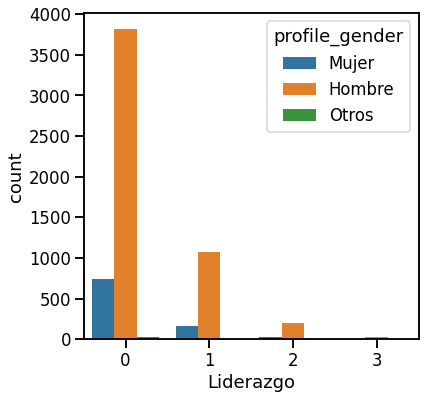

In [ ]:
# Se crea un dataframe y se elimina la entrada de 2500 personas a cargo porque se considera outlier
df_lideres = df[df['work_people_in_charge_of'] !=2500 ]
# Se crea una columna donde se asigna un tipo de liderazgo
# 0 no lideres (0), 1-9 lideres pequeños (1), 10-49 lideres medianos (2), +50 lideres grandes (3)
df_lideres['Liderazgo'] = np.where(df_lideres['work_people_in_charge_of'] >= 1, 1, 0)
df_lideres['Liderazgo'].mask(df_lideres['work_people_in_charge_of']>=10,2, inplace=True)
df_lideres['Liderazgo'].mask(df_lideres['work_people_in_charge_of']>=50,3, inplace=True)
fig = plt.figure(figsize=(6,6))
seaborn.countplot(df_lideres.Liderazgo, hue=df_lideres.profile_gender)

In [ ]:
## Tabla de contingencia Género vs. Liderazgo
pd.crosstab(df_lideres.profile_gender, df_lideres.Liderazgo)

Liderazgo,0,1,2,3
profile_gender,,,,
Hombre,3820,1070,206,25
Mujer,747,159,33,3
Otros,25,5,0,1


In [ ]:
## Tabla de contingencia Género vs. Liderazgo normalizada por género
ct=pd.crosstab(df_lideres.profile_gender, df_lideres.Liderazgo, normalize='index')
pd.crosstab(df_lideres.profile_gender, df_lideres.Liderazgo, normalize='index')

Liderazgo,0,1,2,3
profile_gender,,,,
Hombre,0.745948,0.208944,0.040227,0.004882
Mujer,0.792994,0.168790,0.035032,0.003185
Otros,0.806452,0.161290,0.000000,0.032258


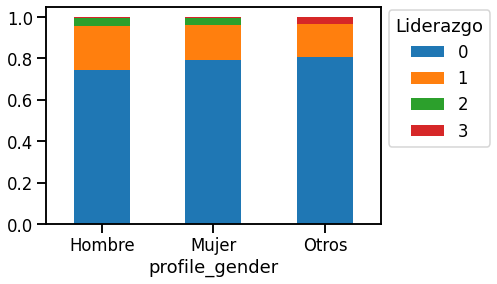

In [ ]:
ax=ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Liderazgo', bbox_to_anchor=(1, 1.02), loc='upper left')

Se observa que ocurre el fenómeno de **techo de cristal**, en donde las mujeres ocupan porcentualmente menos posiciones de liderazgo en todos los estratos en comparación a los hombres.

In [ ]:
# Gráfica para el tweet, no se tiene en cuenta el género Otros por ser poco frecuente
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["No posee personas a cargo", "Posee entre 1 y 9 personas a cargo", "Posee entre 10 y 49 personas a cargo", "Posee 50 o más personas a cargo"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[74.6, 20.9, 4, 0.5], name="Hombre"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[79.3, 16.9, 3.5, 0.3], name="Mujer"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Posiciones de liderazgo según género",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Hombre', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Mujer', x=0.83, y=0.5, font_size=20, showarrow=False)])
fig.show()